# Gradient descent to learn a best-fit line
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/ml_tutorial_ncat/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/ml_tutorial_ncat/blob/main/code/gradient_descent_OLS.ipynb)

We borrowed quite a bit of the linear regression material from the following site. The main gif and github links are also provided below.

* Main Page:
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

* github: 
https://github.com/chasinginfinity/ml-from-scratch/tree/master/02%20Linear%20Regression%20using%20Gradient%20Descent

* gif showing gradient descent at work: 
https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/animation1.gif

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats, odr
import matplotlib as mpl

In [2]:
# Input data
"""
This script performs the following operations:

1. Reads input data from a CSV file hosted on GitHub.
2. Extracts the first column of the data as the feature variable `X`.
3. Centers the feature variable `X` by subtracting its mean.
4. Extracts the second column of the data as the target variable `Y`.

Variables:
    url (str): The URL of the CSV file containing the input data.
    data (DataFrame): The DataFrame containing the input data read from the CSV file.
    X (ndarray): The feature variable, centered by subtracting its mean.
    Y (ndarray): The target variable.
"""
url = "https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv"
data = pd.read_csv(url)

X = np.array(data.iloc[:, 0])
X = X - np.mean(X)
Y = np.array(data.iloc[:, 1])

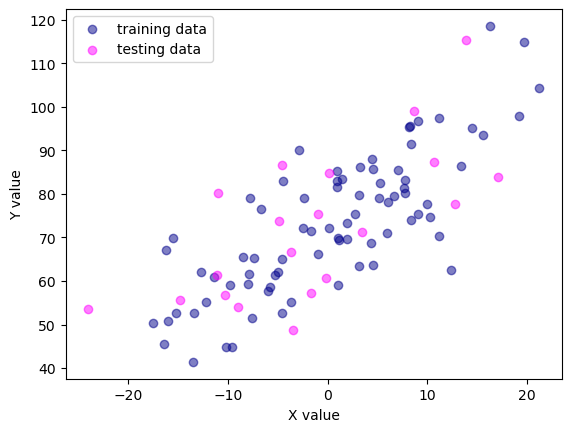

In [3]:
"""
This script splits the dataset into training and testing samples, and visualizes the split using a scatter plot.

Functions:
    train_test_split(X, Y, test_size=0.2): Splits the data into training and testing sets.

Variables:
    Xtrain: Training data features.
    Xtest: Testing data features.
    Ytrain: Training data labels.
    Ytest: Testing data labels.

Plot:
    A scatter plot showing the training data in dark blue and the testing data in fuchsia.
    - X-axis: X value
    - Y-axis: Y value
    - Legend: Indicates training and testing data
"""
# split the data into training and testing samples,
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)

plt.scatter(Xtrain, Ytrain, color="darkblue", label="training data", alpha=0.5)
plt.scatter(Xtest, Ytest, color="fuchsia", label="testing data", alpha=0.5)
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.show()

In [4]:
# function implementation
def my_fit(m, c, x):
    """
    Calculate the linear fit for given slope, intercept, and independent variable.

    Parameters:
    m (float): The slope of the line.
    c (float): The y-intercept of the line.
    x (array-like): The independent variable.

    Returns:
    y (array-like): The dependent variable / predictand calculated as y = m * x + c.
    """
    # m: the slope of the line
    # c: the y-intercept
    # x: independent variable
    # y: dependent variable / predictand
    y = m * x + c
    return y


def my_gradLoss(xtrain, ytrain, ypred):
    """
    Calculate the gradient of the loss function with respect to the slope and intercept.

    Parameters:
    xtrain (array-like): The training data for the independent variable.
    ytrain (array-like): The training data for the dependent variable.
    ypred (array-like): The predicted values of the dependent variable.

    Returns:
    gradLoss_m (float): The gradient of the loss function with respect to the slope (m).
    gradLoss_c (float): The gradient of the loss function with respect to the intercept (c).
    """

    n = float(len(xtrain))
    gradLoss_m = 2 / n * sum(xtrain * (ypred - ytrain))  # derivative wrt m
    gradLoss_c = 2 / n * sum((ypred - ytrain))  # derivative wrt c

    return gradLoss_m, gradLoss_c

In [5]:
"""
This script performs gradient descent to optimize the coefficients of a simple linear regression model.

Attributes:
    learning_rate (float): The learning rate, which determines the size of the steps taken down the gradient.
    epochs (int): The number of iterations to run over the entire training set.
    m (float): The initial slope of the linear model, initialized randomly.
    c (float): The initial y-intercept of the linear model, initialized randomly.
    errorHistory (numpy.ndarray): An array to store the error at each epoch.

Functions:
    my_fit(m, c, Xtrain): Computes the predicted values of y based on the current model coefficients.
    my_gradLoss(Xtrain, Ytrain, Y_pred): Computes the gradient of the loss function with respect to the coefficients.

Procedure:
    1. Initialize the model coefficients (m and c) randomly.
    2. For each epoch:
        a. Compute the predicted values (Y_pred) using the current model.
        b. Compute the gradients of the loss function with respect to m and c.
        c. Update the coefficients by taking a step in the direction of the negative gradient.
        d. Store the current error in errorHistory.
    3. Print the final optimized coefficients.
"""

learning_rate = 0.0001  # MODIFY: the learning rate - the size of the "step" to take down gradient
epochs = 5_000  # MODIFY: the number of iterations to run over the entire training set

# Building the model
m = np.random.uniform()
c = np.random.uniform()

errorHistory = np.empty((epochs,))

# Performing Gradient Descent
for i in range(epochs):

    Y_pred = my_fit(m, c, Xtrain)  # the current predicted value of y
    gradLoss_m, gradLoss_c = my_gradLoss(
        Xtrain, Ytrain, Y_pred
    )  # compute the direction of down gradient of the loss function with respect to the coefficients
    m = m - learning_rate * gradLoss_m  # update the slope m
    c = c - learning_rate * gradLoss_c  # update the y-intercept c

    errorHistory[i] = 1 / float(len(Y)) * np.sum((Ytrain - Y_pred) ** 2)

print("done training")
print("")
print("  slope (m)             y-int (c)")
print("----------------------------------")
print(str(np.around(m, 5)) + "                 " + str(np.around(c, 5)))

done training

  slope (m)             y-int (c)
----------------------------------
1.47084                 46.2296


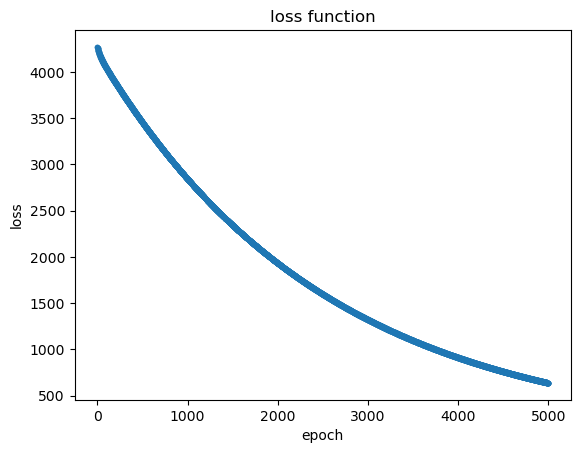

In [6]:
"""
Create a plot of the error history, showing how the loss function
changes over the epochs during the gradient descent optimization process.
"""

plt.figure()
plt.plot(np.arange(0, len(errorHistory)), errorHistory, ".-")
plt.title("loss function")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

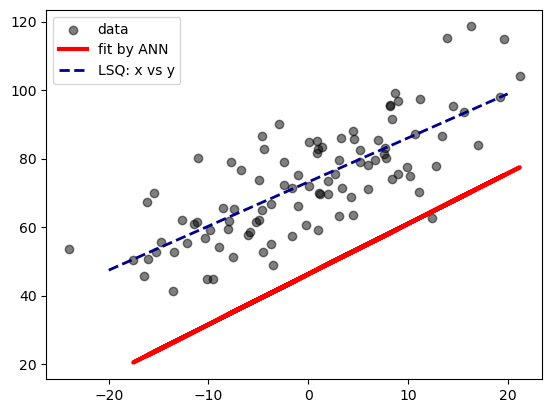

In [7]:
# Making predictions - FINAL
Y_pred = my_fit(m, c, Xtrain)
Y_predTest = my_fit(m, c, Xtest)

plt.figure()
plt.scatter(X, Y, color="black", label="data", alpha=0.5)
# plt.plot(Xtrain, Y_pred, 'x', color='cornflowerblue', label = 'training data')
# plt.plot(Xtest, Y_predTest, 'x', color='fuchsia', label= 'testing data')

plt.plot(Xtrain, Y_pred, "-r", label="fit by ANN", linewidth=3)  # regression line

slope, intercept, r_value, p_value, std_err = stats.linregress(
    np.squeeze(X), np.squeeze(Y)
)
x_plot = np.linspace(-20, 20, 100)
plt.plot(
    x_plot,
    intercept + x_plot * slope,
    "--",
    color="darkblue",
    label="LSQ: x vs y",
    linewidth=2,
)

plt.legend()
plt.show()